# <center><b> Práctica 1 de Laboratorio 4 </b><br><u> Espectroscopía Óptica </u></center>

Grupo 1: Trinidad Borrel, Bruno Sivilotti, Agustín Brusco

In [16]:
# Imports
import os

import numpy as np
import scipy.constants as cte
from scipy.signal import find_peaks
import cv2 as cv
from espectroscopia_optica_funcs import balmer_wavelength, wavelength_to_RGB,\
                                        get_column_intensity, get_wavelength_from_He

import matplotlib.pyplot as plt

# Formato para matplotlib
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format='retina'
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['figure.dpi'] = 120
rcParams['legend.fontsize'] = 10
rcParams['axes.labelsize'] = 'large'
rcParams['axes.xmargin'] = 0

# Carga de los datos en entorno de colab
directory_path = os.getcwd()
folder_name = os.path.basename(directory_path)
if folder_name != 'Datos y código - Práctica 1':
    try:
        os.chdir("/content/Laboratorio_5_Datos/Datos y código - Práctica 1")
    except FileNotFoundError:
        !git clone https://github.com/agustinbrusco/Laboratorio_5_Datos.git
        os.chdir("/content/Laboratorio_5_Datos/Datos y código - Práctica 1")

# Formato para los gráficos:
MARKER_FMT = dict(markersize=6, markeredgewidth=0.25, markeredgecolor='k',)
SCATTER_FMT = dict(linewidths=0.15, edgecolors='k',)
ERROR_FMT = dict(ecolor='k', capsize=2,)

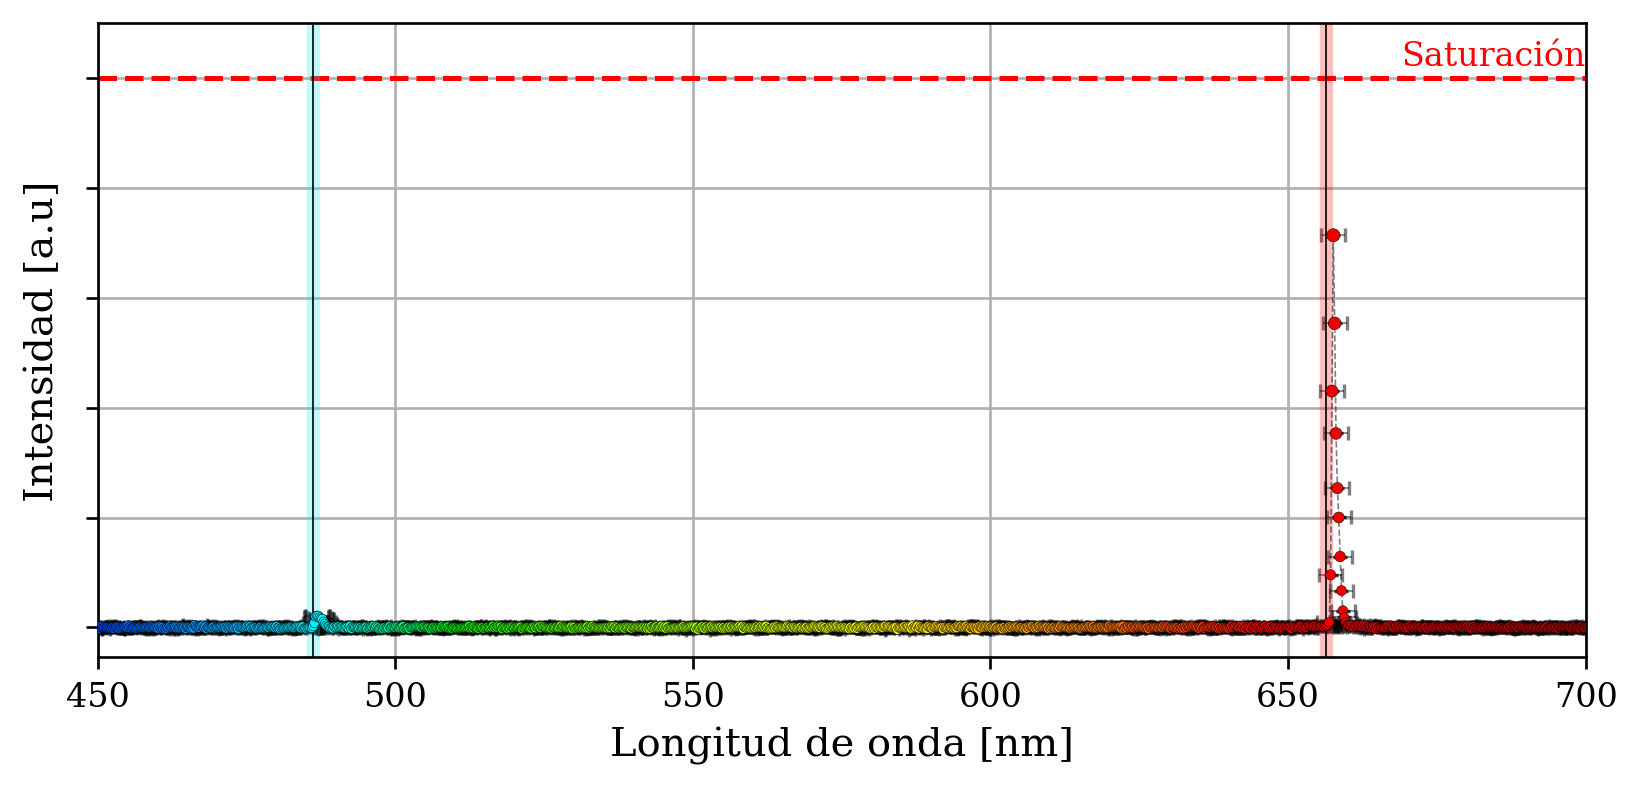

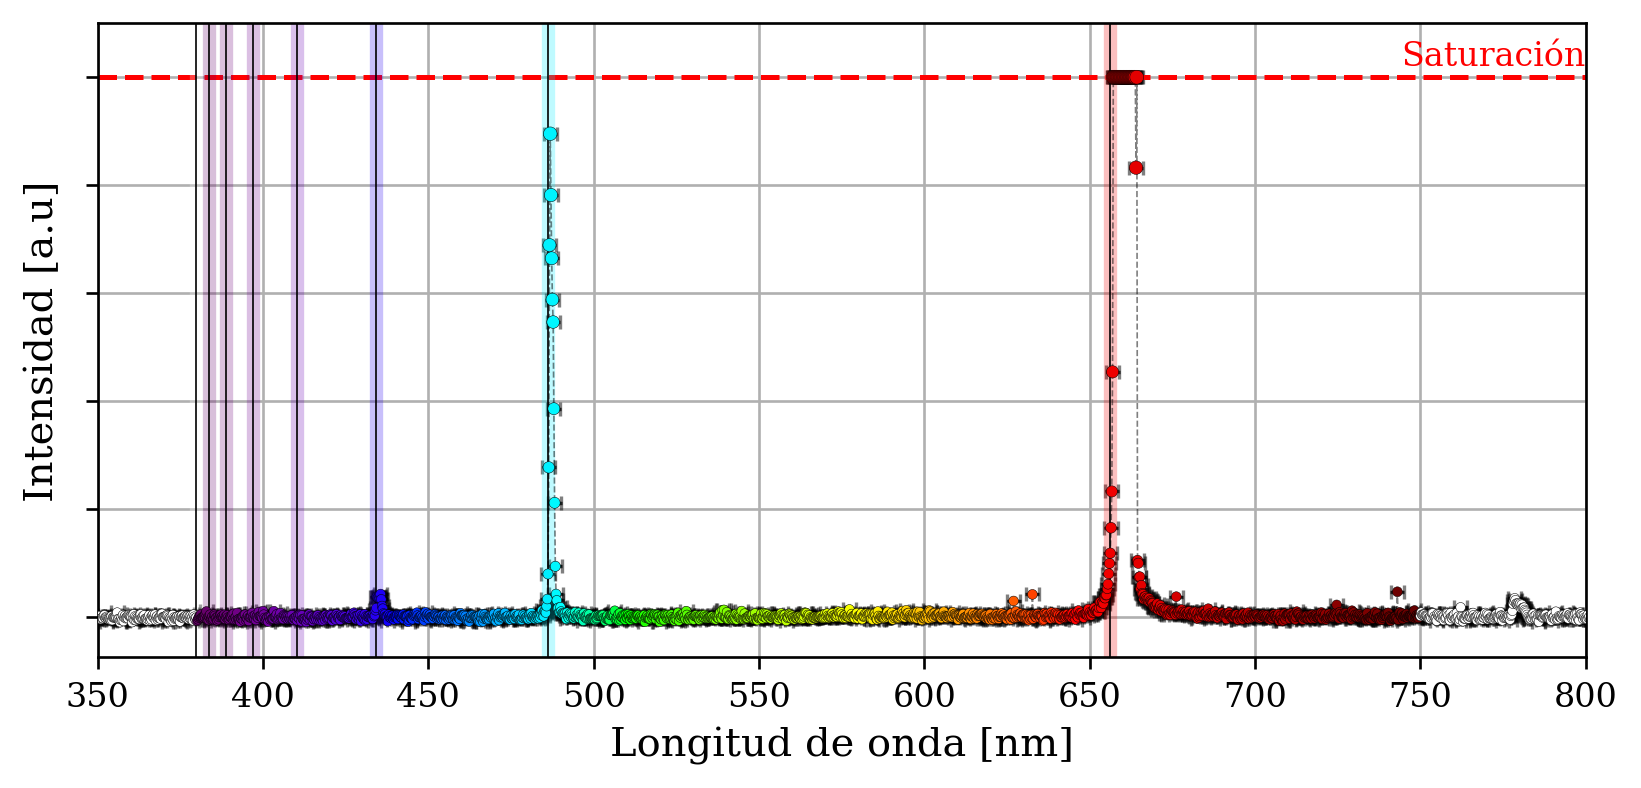

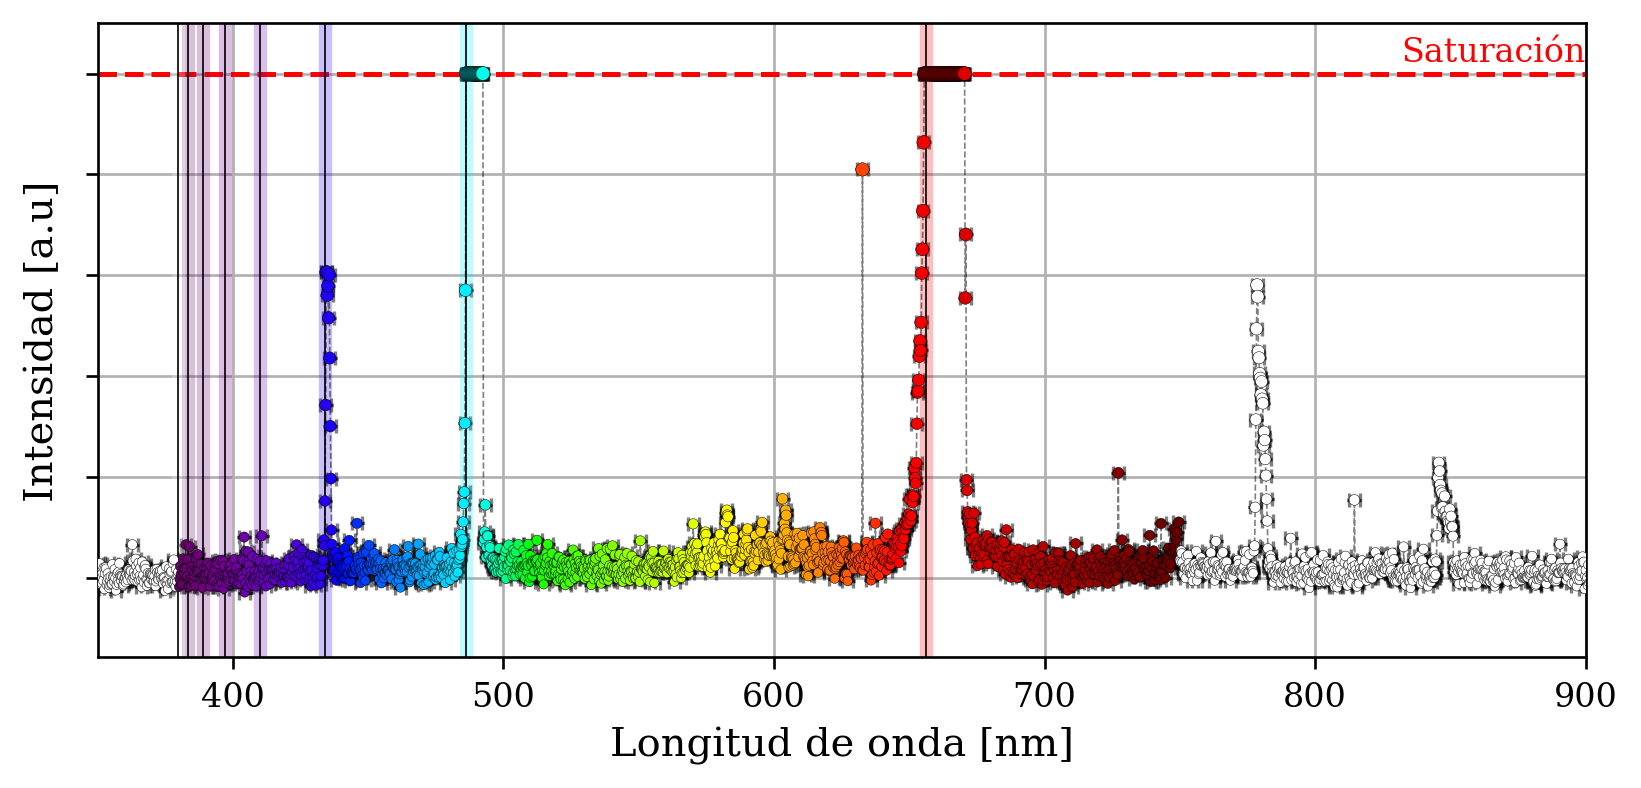

In [17]:
# Mediciones del espectro de emisión del hidrógeno con espectrometro compacto
bal_lines = [balmer_wavelength(n)*1e9 for n in range(3, 10+1)]  # nm

wavelens_to_show = [(450, 700), (350, 800), (350, 900)]
for i in range(3):
    wavelen, intensity = np.loadtxt(f'espectroH{i}.txt',  # nm, a.u.
                                    delimiter=',', unpack=True)
    
    rgba_colors = [wavelength_to_RGB(lam) for lam in wavelen]
    plt.figure(figsize=(8, 3.5))
    # Barras de error
    plt.errorbar(wavelen, intensity, xerr=2, yerr=0,  # estimar yerr
                fmt='--k', lw=0.5, alpha=0.5, **ERROR_FMT)
    # Puntos coloreados según longitud de onda
    plt.scatter(wavelen, intensity, s=8*np.log(np.e+6*intensity), c=rgba_colors,
                **SCATTER_FMT, zorder=10)
    # Línea de saturación
    plt.axhline(1, ls='--', c='r')
    # Líneas de Balmer:
    for bal in bal_lines:
        plt.axvline(bal, ls='-', lw=4, c=wavelength_to_RGB(bal), alpha=0.25)
        plt.axvline(bal, ls='-', lw=0.5, c='k', alpha=1)
    plt.text(wavelens_to_show[i][-1], 1.01, 'Saturación', c='r',
             va='bottom', ha='right')
    plt.grid()
    plt.xlabel('Longitud de onda [nm]')
    plt.ylabel('Intensidad [a.u]')
    plt.xlim(*wavelens_to_show[i])
    plt.yticks(np.arange(0, 1.1, .2), labels=['' for i in range(0, 11, 2)])
    plt.ylim(top=1.1)
    plt.show()

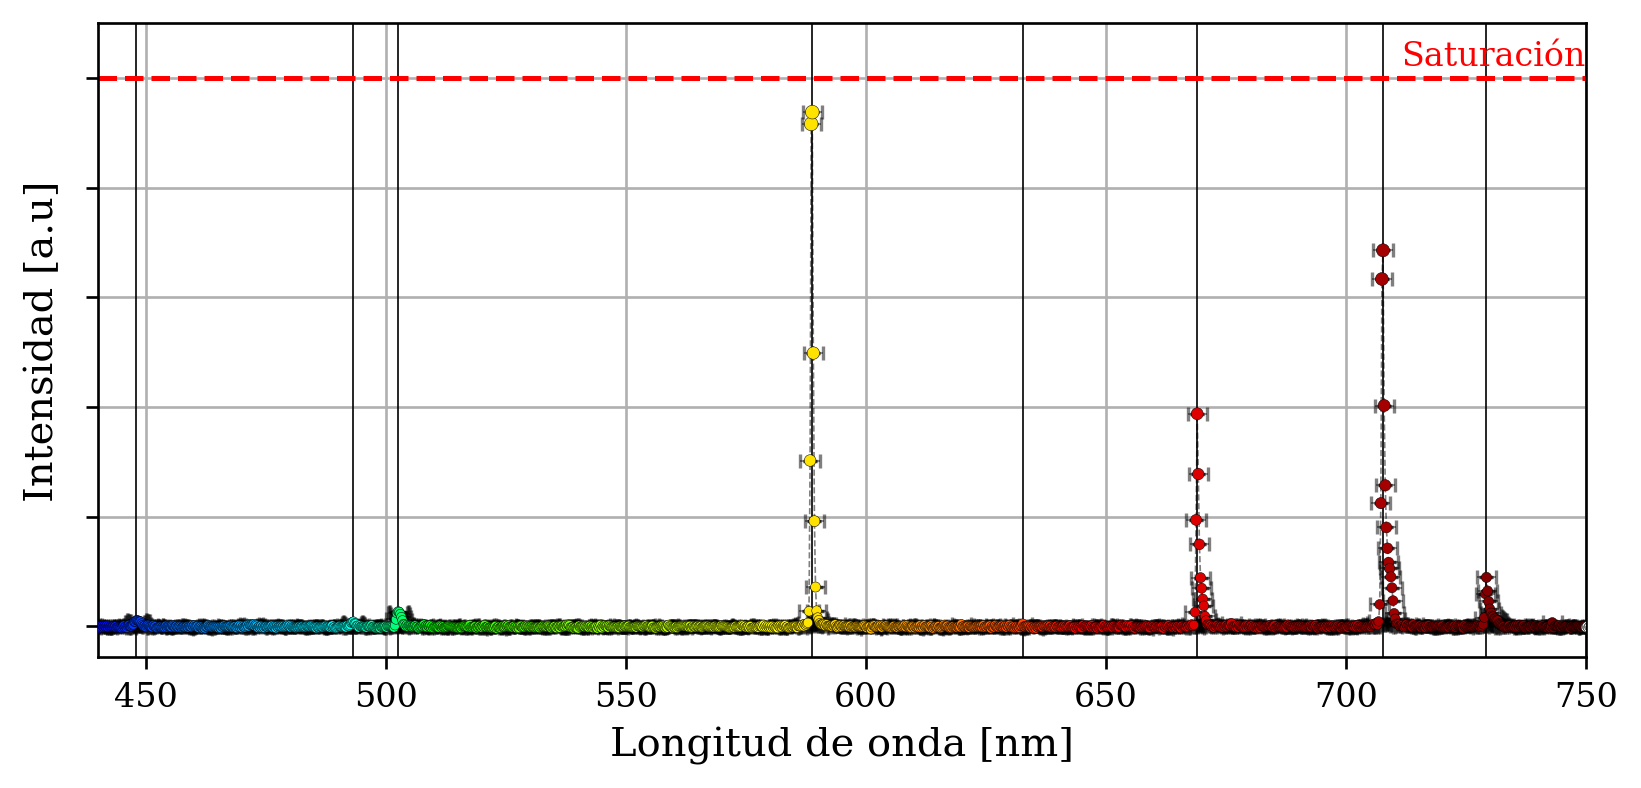

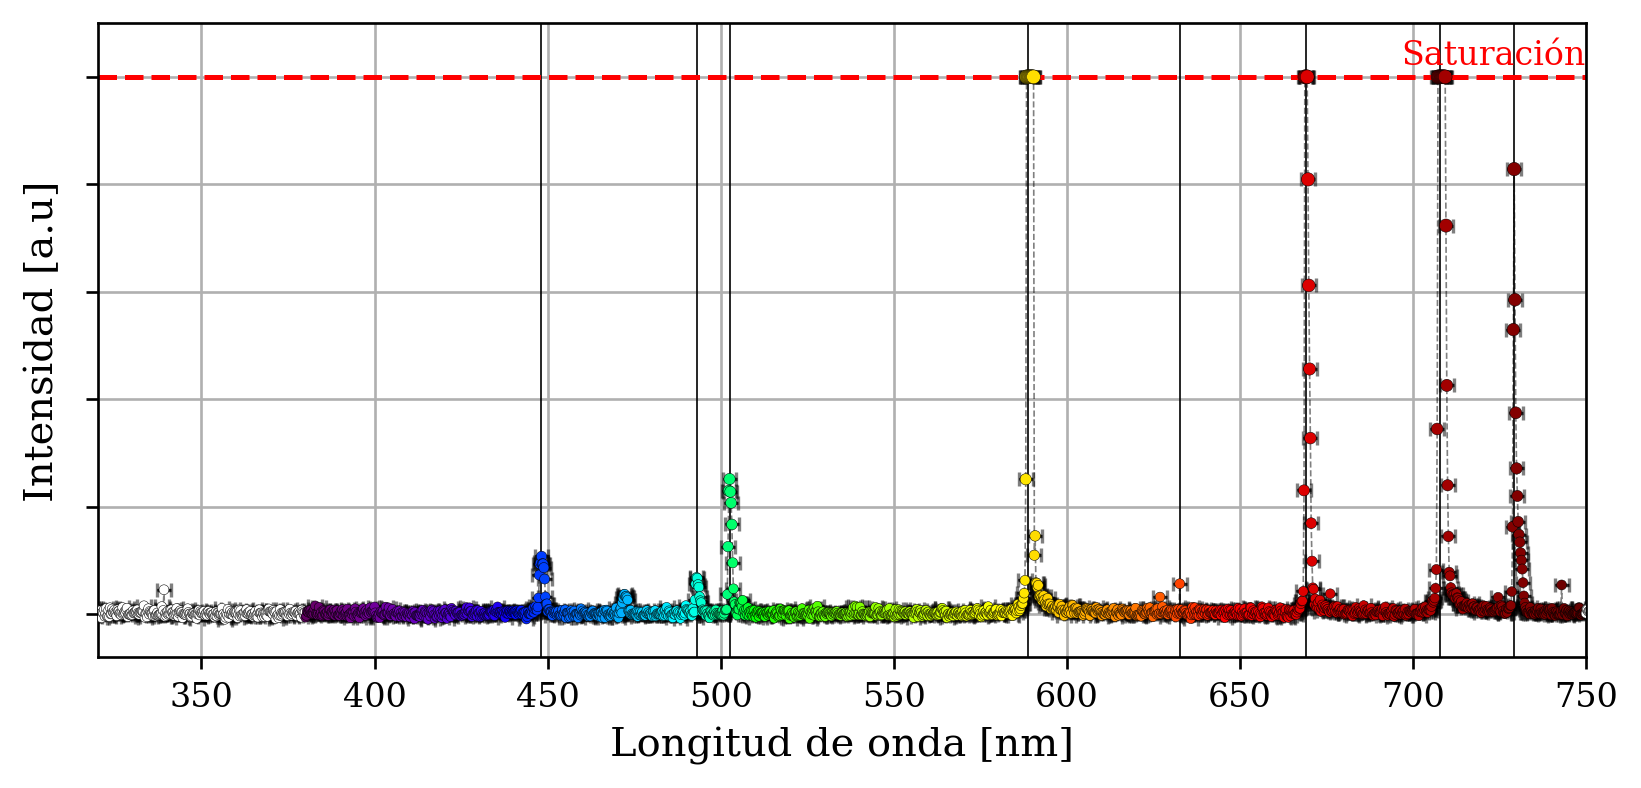

In [18]:
# Mediciones del espectro de emisión del helio con espectrometro compacto
wavelen, helio_0 = np.loadtxt(f'espectroHe0.txt',  # nm, a.u.
                              delimiter=',', unpack=True)
wavelen, helio_1 = np.loadtxt(f'espectroHe1.txt',  # nm, a.u.
                              delimiter=',', unpack=True)
# Busqueda de máximos:
peaks_CCS200 = find_peaks(helio_0, prominence=8e-3, distance=10, width=2)
lam_peaks = wavelen[peaks_CCS200[0]]  # nm
# Coloreado de las frecuencias:
rgba_colors = [wavelength_to_RGB(lam) for lam in wavelen]

wavelens_to_show = [(440, 750), (320, 750)]
for i, intensity in enumerate([helio_0, helio_1]):    
    plt.figure(figsize=(8, 3.5))
    # Barras de error
    plt.errorbar(wavelen, intensity, xerr=2, yerr=0,  # estimar yerr
                fmt='--k', lw=0.5, alpha=0.5, **ERROR_FMT)
    # Puntos coloreados según longitud de onda
    plt.scatter(wavelen, intensity, s=8*np.log(np.e+6*intensity), c=rgba_colors,
                **SCATTER_FMT, zorder=10)
    # Lineas de picos
    for lam in lam_peaks:
        plt.axvline(lam, ls='-', lw=0.5, c='k', alpha=1)
    # Línea de saturación
    plt.axhline(1, ls='--', c='r')
    plt.text(wavelens_to_show[i][-1], 1.01, 'Saturación', c='r',
             va='bottom', ha='right')
    plt.grid()
    plt.xlabel('Longitud de onda [nm]')
    plt.ylabel('Intensidad [a.u]')
    plt.xlim(*wavelens_to_show[i])
    plt.yticks(np.arange(0, 1.1, .2), labels=['' for i in range(0, 11, 2)])
    plt.ylim(top=1.1)
    plt.show()

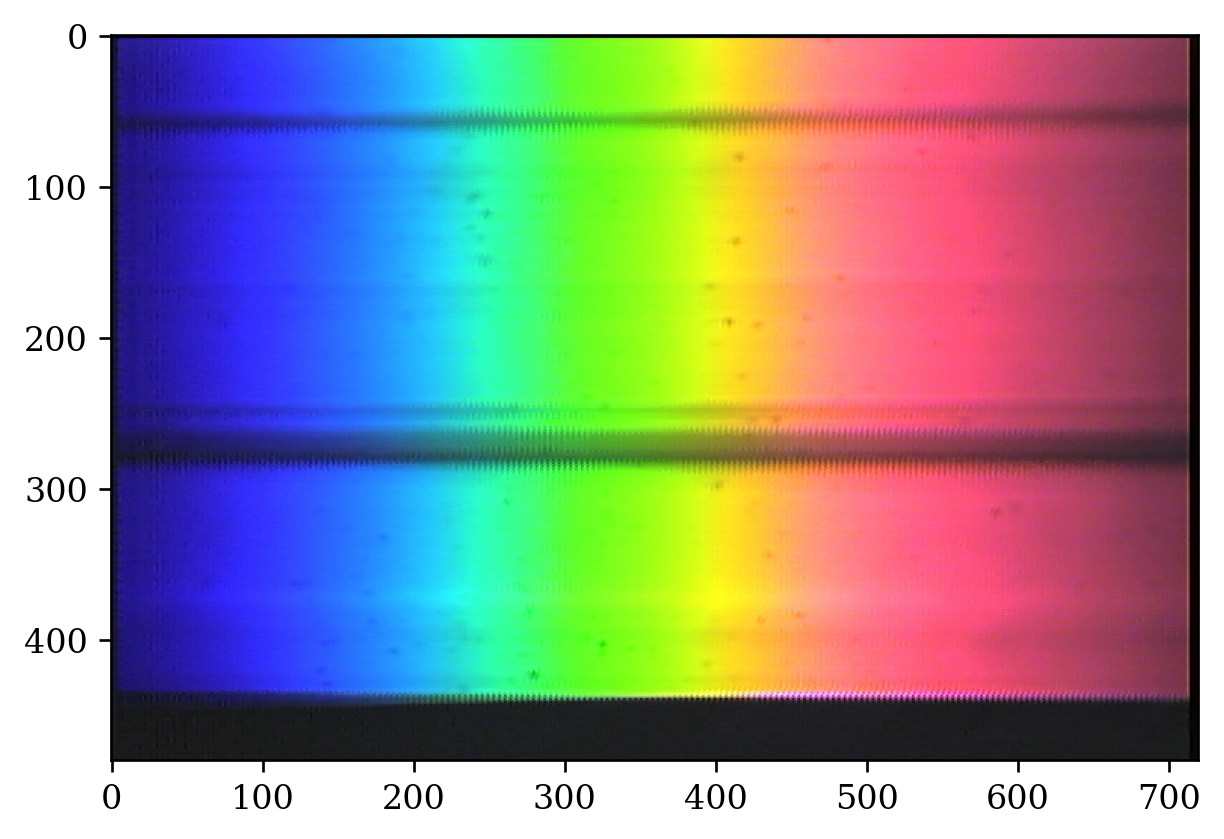

In [19]:
img = cv.imread('LuzBlanca0.jpg')
img_rows, img_cols, img_channels = img.shape

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

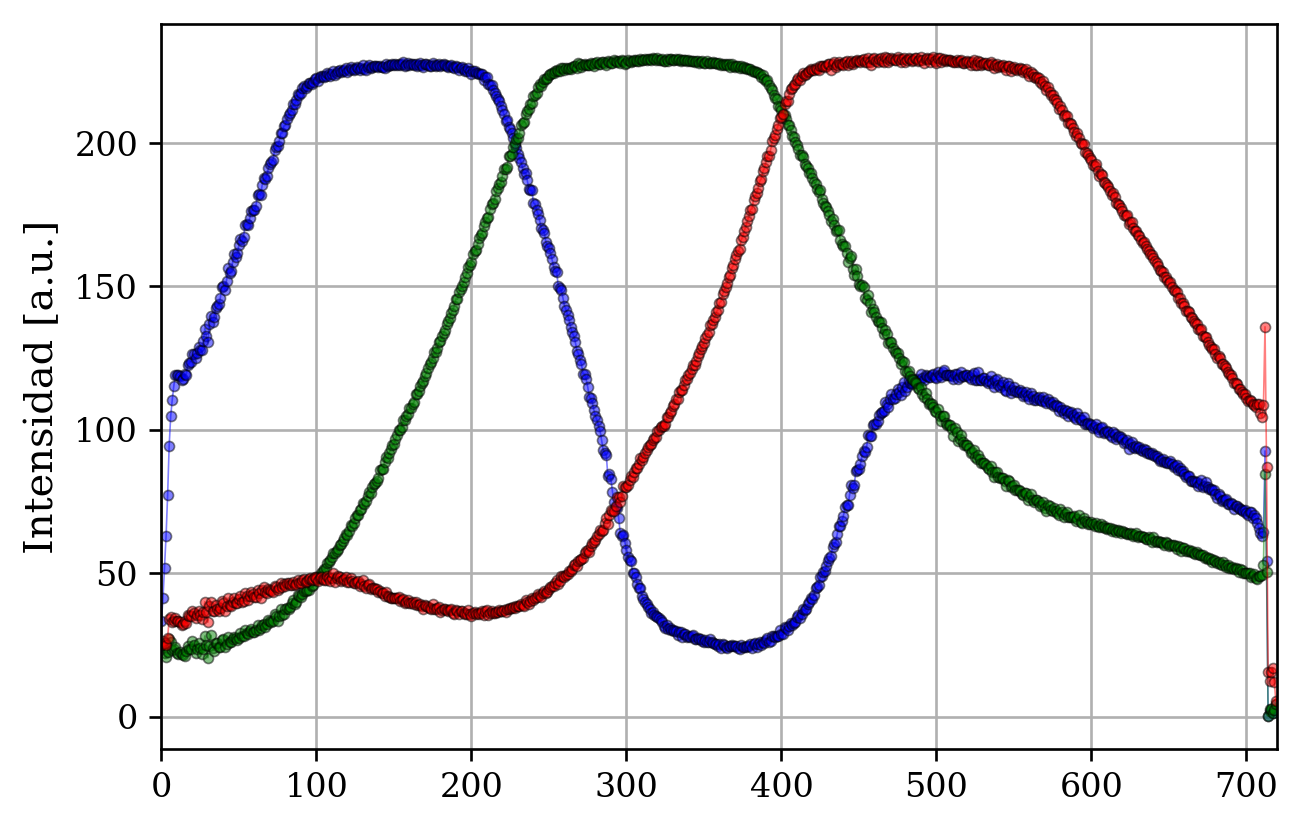

In [20]:
colors = np.sum(img, axis=0)/img.shape[0]
for c, color_response in zip('bgr', colors.T):
    plt.plot(color_response, f'{c}.-',
             mew=0.5, mec='k', lw=0.5, alpha=0.5)
plt.grid()
plt.ylabel('Intensidad [a.u.]')
plt.xlim(0, img_cols)
plt.show()

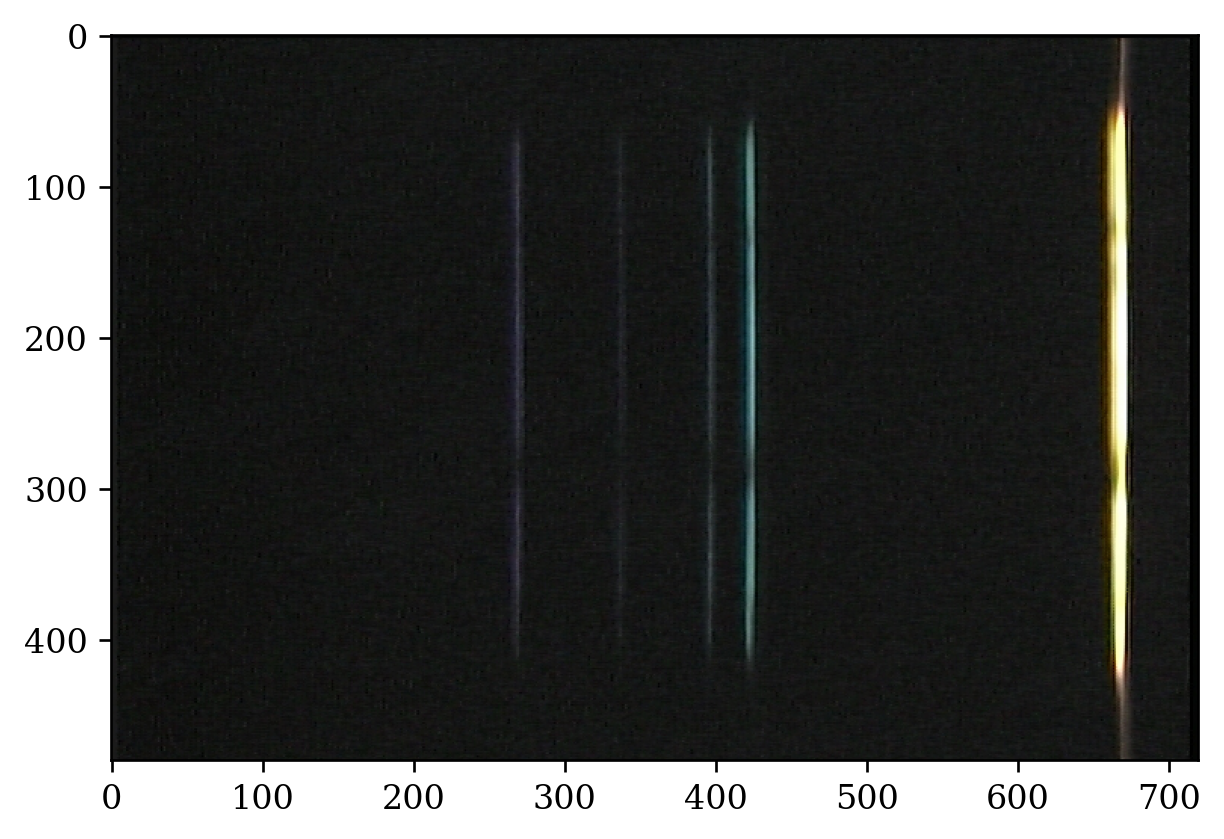

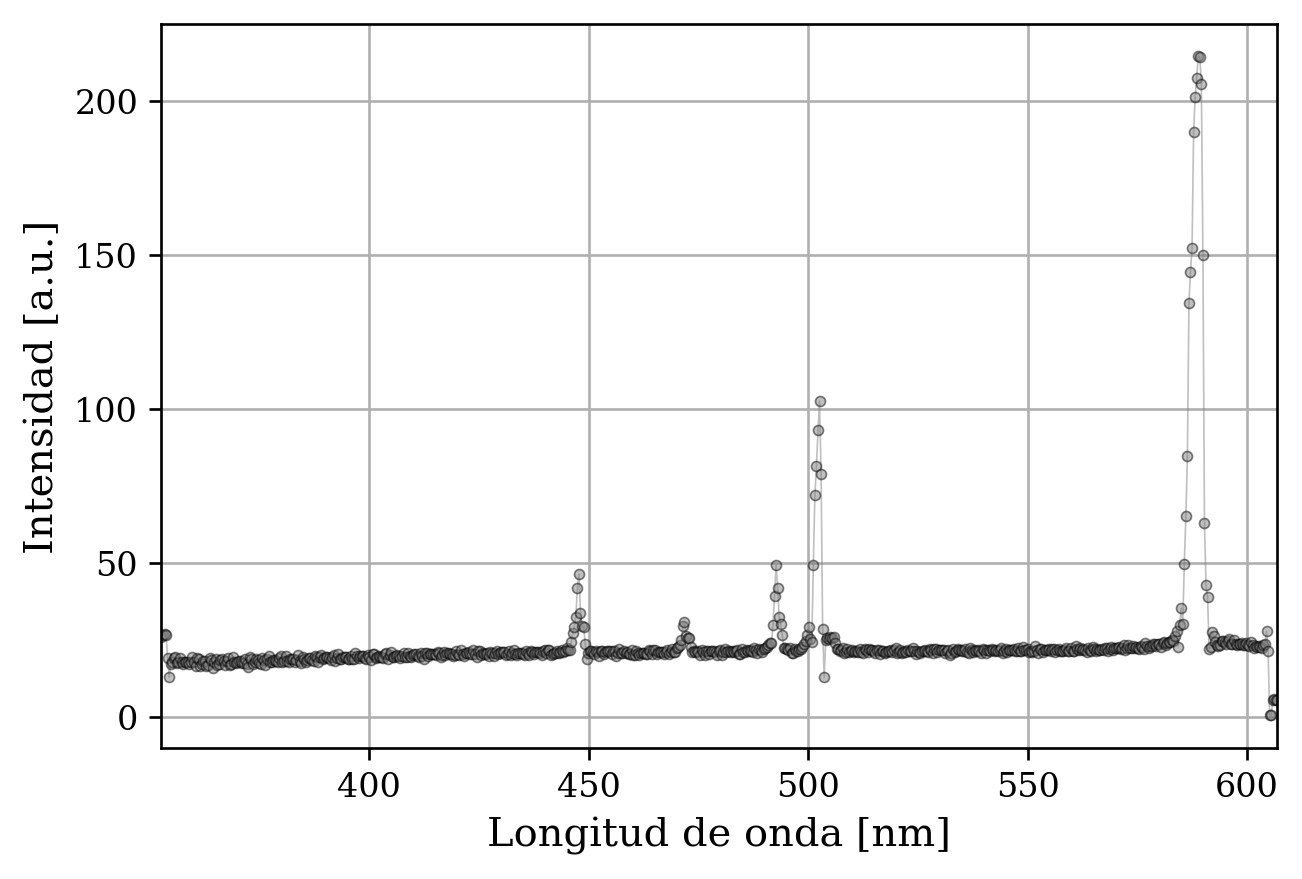

In [22]:
img = cv.imread('Helio1.jpg',)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

grises = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
intensidad = np.sum(grises, axis=0)/grises.shape[0]

plt.plot(get_wavelength_from_He('Helio1.jpg'), intensidad, '.-', c='grey',
         mew=0.5, mec='k', lw=0.5, alpha=0.5)
plt.grid()
plt.xlabel('Longitud de onda [nm]')
plt.ylabel('Intensidad [a.u.]')

plt.show()